In [242]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

In [243]:
df = pd.read_json('users.json') 

In [244]:
df.head()

,about,created,error,id,karma,submitted
0,NaN,1.510266e+09,NaN,gcgggfxsdg,-1.0,5
1,"Ruby, Open Source, Devops",1.325548e+09,NaN,sheerun,102.0,51
2,NaN,1.459331e+09,NaN,keypress,79.0,70
3,[ my public key: https:&#x2F;&#x2F;keybase.io&...,1.379698e+09,NaN,pyprism,1356.0,114
4,Email: ejstronge@gmail.com\nGithub: https:&#x2...,1.355740e+09,NaN,ejstronge,460.0,144


In [245]:
def convertunixtime(a):
    return a/(60*60*24*365)

In [246]:
convertunixtime(1500000000)

47.564687975646876

In [247]:
df=df[df['created'].notnull()]

In [248]:
df=df[df['karma'].notnull()]

In [249]:
#x = df['created']
#y.shape
x = df['created']
y = df['karma']

In [250]:
#y = df['submitted']

Part 1.1 Data preprocessing

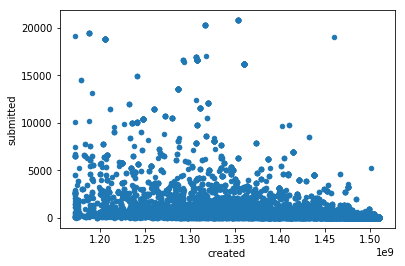

In [251]:
df.plot.scatter(x = 1, y = 5)

Part 1.2 Model Selection

We have choosen linear regression model, because it seems to fits the scatter plots shown in the graph above. There are some 
outlieres, but the majority of the data points are gathered in a cluster. We can almost see a straight line through the data points. 

Part 1.3 Model training

In [252]:
#x2 = np.array(x)

In [253]:
#y2 = np.array(y)

In [254]:
xs_re=np.array(x).reshape(-1,1)
ys_re=np.array(y).reshape(-1,1)

In [255]:
#ys_re

In [256]:
import sklearn.linear_model

In [257]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_re,ys_re)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Part 1.4: Model evaluation

In [258]:
model.coef_

array([[-3.68490613e-05]])

In [259]:
model.intercept_

array([54944.17572095])

In [260]:
def f(x):
    return -3.68490613e-05*x + 54944.17572095

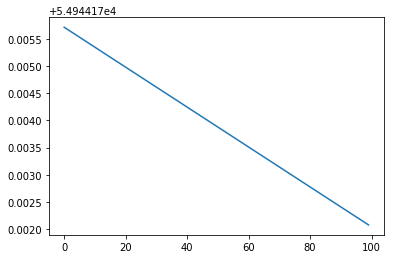

In [261]:
plt.plot(np.arange(100),f(np.arange(100)))

We have included created and karma in order to predict when a user will hit 1000 points. We see that there is a negative coefficient which translates to loosing points over time. This means in order to get a 1000 points, we used the data for model fitting

In [262]:
f(1000)

54944.1388718887

We are unsure what this number actually means 

Part 2: Predicting Hackernews points with multivariate linear regression 

In [263]:
df=df[df['submitted'].notnull()]

In [264]:
z = df['submitted']

In [265]:
zs_re=np.array(z).reshape(-1,1)

In [267]:
zs_re.shape

(9299, 1)

In [268]:
ys_re.shape

(9299, 1)

In [269]:
xs_re.shape

(9299, 1)

In [266]:
model.fit(xs_re,ys_re,zs_re)

ValueError: Sample weights must be 1D array or scalar

Part 3: Prediction of breast cancer with logistic regression

In [273]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")

In [274]:
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [276]:
len(data)

568

In [278]:
data.shape 
# the size of data

(568, 32)

There is no explanation of the columns in the dataset. The second columun seems to indicate two different types of breast cancer (Benign, Malign). The types of cancer can be classified as labels.  